
 **PGCC009 Ciência de Dados e Aprendizado de Máquina<br>
Atividade 3**

Para esta atividade vamos usar mais uma base disponibilizada pela iniciativa Dados Abertos de Feira (https://www.dadosabertosdefeira.com.br/) com dados do Mapa da Violência de Feira de Santana (https://dadosabertosdefeira.medium.com/mapa-da-viol%C3%AAncia-de-feira-de-santana-2017-a-2020-c267ad0088aa)

São dados de registros de ocorrências policiais no município de Feira de Santana tendo policiais militares como condutores, obtidos da  coordenação de documentação e estatística policial  da Policia Civil da Bahia.

Estes dados foram pré-processados e transformados pelo professor para contagem semanal das ocorrências mais frequentes nos bairros com maior número de ocorrências, e está disponível em http://aulas.artificial.eng.br/Home/pgcc009/ocorrenciassemanaisporbairro-feiradesantana.csv

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from IPython.display import display, HTML

import urllib.request

opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36')]
urllib.request.install_opener(opener)

url = "http://aulas.artificial.eng.br/Home/pgcc009/ocorrenciassemanaisporbairro-feiradesantana.csv"
urllib.request.urlretrieve (url, "ocorrenciassemanaisporbairro-feiradesantana.csv")

ocorrdf = pd.read_csv("ocorrenciassemanaisporbairro-feiradesantana.csv",index_col=False)

In [ ]:
display("DIMENSOES",ocorrdf.shape)

display(ocorrdf.head(5))

'DIMENSOES'

(2094, 44)

,Unnamed: 0,bairro,isoyear,isoweek,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS,week-1s,year-1s,week-2s,year-2s,isoyear-1s,isoweek-1s,AMEACA-1s,ESTELIONATO-1s,FURTO-1s,HOMICIDIO-1s,INJURIA-1s,LESAO-1s,ROUBO-1s,VIAS-1s,week-1s-1s,year-1s-1s,week-2s-1s,year-2s-1s,isoyear-2s,isoweek-2s,AMEACA-2s,ESTELIONATO-2s,FURTO-2s,HOMICIDIO-2s,INJURIA-2s,LESAO-2s,ROUBO-2s,VIAS-2s,week-1s-2s,year-1s-2s,week-2s-2s,year-2s-2s
0,0,BRASILIA,2017,1,1.0,2.0,1.0,NaN,NaN,1.0,5.0,1.0,52,2016,51,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BRASILIA,2017,2,2.0,2.0,3.0,NaN,NaN,1.0,1.0,NaN,1,2017,52,2016,2017.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,5.0,1.0,52.0,2016.0,51.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,BRASILIA,2017,3,2.0,1.0,3.0,NaN,NaN,1.0,2.0,NaN,2,2017,1,2017,2017.0,2.0,2.0,2.0,3.0,NaN,NaN,1.0,1.0,NaN,1.0,2017.0,52.0,2016.0,2017.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,5.0,1.0,52.0,2016.0,51.0,2016.0
3,3,BRASILIA,2017,4,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,3,2017,2,2017,2017.0,3.0,2.0,1.0,3.0,NaN,NaN,1.0,2.0,NaN,2.0,2017.0,1.0,2017.0,2017.0,2.0,2.0,2.0,3.0,NaN,NaN,1.0,1.0,NaN,1.0,2017.0,52.0,2016.0
4,4,BRASILIA,2017,5,4.0,1.0,NaN,NaN,NaN,NaN,5.0,NaN,4,2017,3,2017,2017.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,3.0,2017.0,2.0,2017.0,2017.0,3.0,2.0,1.0,3.0,NaN,NaN,1.0,2.0,NaN,2.0,2017.0,1.0,2017.0


In [ ]:
display(ocorrdf.nunique())

display(ocorrdf.dtypes)

Unnamed: 0        2094
bairro              10
isoyear              5
isoweek             53
AMEACA              17
ESTELIONATO         32
FURTO               57
HOMICIDIO            5
INJURIA              5
LESAO               12
ROUBO               34
VIAS                 4
week-1s             52
year-1s              5
week-2s             52
year-2s              5
isoyear-1s           5
isoweek-1s          52
AMEACA-1s           17
ESTELIONATO-1s      32
FURTO-1s            57
HOMICIDIO-1s         5
INJURIA-1s           5
LESAO-1s            12
ROUBO-1s            34
VIAS-1s              4
week-1s-1s          52
year-1s-1s           5
week-2s-1s          52
year-2s-1s           5
isoyear-2s           5
isoweek-2s          52
AMEACA-2s           17
ESTELIONATO-2s      32
FURTO-2s            57
HOMICIDIO-2s         5
INJURIA-2s           5
LESAO-2s            12
ROUBO-2s            34
VIAS-2s              4
week-1s-2s          52
year-1s-2s           5
week-2s-2s          52
year-2s-2s 

Unnamed: 0          int64
bairro             object
isoyear             int64
isoweek             int64
AMEACA            float64
ESTELIONATO       float64
FURTO             float64
HOMICIDIO         float64
INJURIA           float64
LESAO             float64
ROUBO             float64
VIAS              float64
week-1s             int64
year-1s             int64
week-2s             int64
year-2s             int64
isoyear-1s        float64
isoweek-1s        float64
AMEACA-1s         float64
ESTELIONATO-1s    float64
FURTO-1s          float64
HOMICIDIO-1s      float64
INJURIA-1s        float64
LESAO-1s          float64
ROUBO-1s          float64
VIAS-1s           float64
week-1s-1s        float64
year-1s-1s        float64
week-2s-1s        float64
year-2s-1s        float64
isoyear-2s        float64
isoweek-2s        float64
AMEACA-2s         float64
ESTELIONATO-2s    float64
FURTO-2s          float64
HOMICIDIO-2s      float64
INJURIA-2s        float64
LESAO-2s          float64
ROUBO-2s    

#1 - Faça análise exploratória dos dados, examine com cuidado o que está presente no conjunto de dados. Quais são os atributos e como se distribuem seus valores? Faça agrupamentos/filtragens. Utilize estatística descritiva. Discuta o que observou.

A base de dados apresenta as ocorrências de ameaça, estelionato, furto, homicídio, injúria, lesão, roubo e vias de fato, ao longo das semanas, em 10 bairros da cidade de Feira de Santana, bem como o ano e a semana do ano onde ocorreram os registros. Para cada semana corrente, há também informações de dados dos mesmos atributos nas duas semanas imediatamente anteriores a ela. Consta também a informação do bairro onde ocorreram os registros.

Como se apresentam os valores de média, desvio padrão, e dos quartis para cada atributo relativo a ocorrências na semana corrente?

In [ ]:
semana_corrente = ocorrdf[['AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS']].describe()
display('Ocorrências gerais na semana corrente')
display(semana_corrente)

'Ocorrências gerais na semana corrente'

,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS
count,1761.000000,1121.000000,1768.000000,486.000000,691.000000,1254.000000,2018.000000,391.000000
mean,3.304373,3.658341,6.172511,1.323045,1.392185,2.100478,6.521308,1.179028
std,2.521595,6.585980,10.624272,0.623065,0.704764,1.518006,5.865269,0.445686
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
50%,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,5.000000,1.000000
75%,4.000000,3.000000,4.000000,2.000000,2.000000,3.000000,8.000000,1.000000
max,20.000000,123.000000,71.000000,5.000000,5.000000,13.000000,41.000000,4.000000


De maneira geral, a ocorrência mais frequente, considerando as semanas correntes é a de roubo, somente em 76 semanas não ocorreu um roubo em Feira de Santana, a ocorrência apresentou uma média de 6.52, em 50% das semanas onde houve ocorrência foram registrados até 5 roubos, contudo, em 25% das semanas foram registrados mais de 8 ocorrências de roubo, sendo que em determinada semana foram registrados 41 ocorrências.

Outra ocorrência frequente é a de furtos, com média de 6.17 registros, em 50% das semanas onde houve ocorrência foram registrados até 2 furtos, contudo, em 25% das semanas foram registrados mais de 4 ocorrências de furto, sendo que em determinada semana foram registrados 71 ocorrências.

A ocorrência de estelionatos apresenta média de 3.65 ocorrências, sendo que em 75% das semanas onde houve ocorrência foram registrados até 3 casos, mas um máximo de 123 registros em determinada semana.

Para os atributos acima, e também para a ocorrência de ameaças, o valor do desvio padrão e do valor máximo, indicam que em determinadas semanas a quantidade de ocorrências apresenta um padrão diferente da distribuição. Os valores presentes no último quartil são bem maiores que os valores presentes na distribuição.

Em relação aos homicídios, houve registro dessa ocorrência em 486 semanas, tendo uma média de 1.32 casos por semana, no máximo foram registrados 5 homicídios em uma semana, e em 75% das semanas onde houve ocorrência foram registrados 1 ou 2 homicídios.

Como se apresentam os valores de média, desvio padrão, e dos quartis para cada atributo relativo a ocorrências na semana corrente, considerando cada um dos 10 bairros presentes na base?

In [ ]:
bairros = ocorrdf['bairro'].unique().tolist()
display('Bairros presentes na base de dados')
display(bairros)

'Bairros presentes na base de dados'

['BRASILIA',
 'CAMPO LIMPO',
 'CENTRO',
 'CONCEICAO',
 'DISTRITO DE HUMILDES',
 'MANGABEIRA',
 'MUCHILA',
 'QUEIMADINHA',
 'SANTA MONICA',
 'TOMBA']

In [ ]:
bairro = 'BRASILIA'
display('Ocorrências no bairro ' + bairro)

semana_corrente_bairro = ocorrdf[['AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS']][(ocorrdf['bairro'] == bairro)].describe()
display(semana_corrente_bairro)

'Ocorrências no bairro BRASILIA'

,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS
count,160.000000,123.000000,171.000000,18.0,56.000000,94.000000,202.000000,22.000000
mean,2.212500,1.821138,2.374269,1.0,1.160714,1.425532,3.896040,1.045455
std,1.342988,1.032525,1.704746,0.0,0.370591,0.740377,2.098112,0.213201
min,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,2.000000,1.000000
50%,2.000000,2.000000,2.000000,1.0,1.000000,1.000000,4.000000,1.000000
75%,3.000000,2.000000,3.000000,1.0,1.000000,2.000000,5.000000,1.000000
max,8.000000,7.000000,13.000000,1.0,2.000000,4.000000,10.000000,2.000000


In [ ]:
bairro = 'CAMPO LIMPO'
display('Ocorrências no bairro ' + bairro)

semana_corrente_bairro = ocorrdf[['AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS']][(ocorrdf['bairro'] == bairro)].describe()
display(semana_corrente_bairro)

'Ocorrências no bairro CAMPO LIMPO'

,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS
count,197.000000,128.000000,182.000000,83.000000,85.000000,159.000000,210.000000,58.000000
mean,3.791878,1.656250,2.686813,1.397590,1.388235,2.314465,5.671429,1.275862
std,2.270560,0.864319,1.653973,0.697378,0.674257,1.364738,2.931701,0.555455
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
50%,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,5.000000,1.000000
75%,5.000000,2.000000,3.000000,2.000000,2.000000,3.000000,7.000000,1.000000
max,16.000000,4.000000,12.000000,4.000000,4.000000,8.000000,15.000000,3.000000


In [ ]:
bairro = 'CENTRO'
display('Ocorrências no bairro ' + bairro)

semana_corrente_bairro = ocorrdf[['AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS']][(ocorrdf['bairro'] == bairro)].describe()
display(semana_corrente_bairro)

'Ocorrências no bairro CENTRO'

,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS
count,203.000000,210.000000,210.000000,65.000000,98.000000,175.000000,210.000000,53.000000
mean,5.369458,12.085714,32.623810,1.261538,1.520408,2.960000,17.319048,1.150943
std,3.289114,11.818900,11.282217,0.476869,0.815186,2.077133,5.923606,0.411200
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,3.000000,6.250000,25.250000,1.000000,1.000000,1.000000,13.000000,1.000000
50%,5.000000,9.000000,32.000000,1.000000,1.000000,2.000000,17.000000,1.000000
75%,7.000000,14.000000,38.750000,1.000000,2.000000,4.000000,21.000000,1.000000
max,16.000000,123.000000,71.000000,3.000000,5.000000,11.000000,41.000000,3.000000


In [ ]:
bairro = 'CONCEICAO'
display('Ocorrências no bairro ' + bairro)

semana_corrente_bairro = ocorrdf[['AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS']][(ocorrdf['bairro'] == bairro)].describe()
display(semana_corrente_bairro)

'Ocorrências no bairro CONCEICAO'

,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS
count,176.000000,75.000000,168.000000,54.000000,59.000000,122.000000,199.000000,36.000000
mean,2.630682,1.666667,2.071429,1.185185,1.372881,1.663934,3.839196,1.111111
std,1.502368,0.949158,1.181552,0.437578,0.763348,0.914625,2.396182,0.318728
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000
75%,3.000000,2.000000,3.000000,1.000000,1.500000,2.000000,5.000000,1.000000
max,8.000000,4.000000,6.000000,3.000000,4.000000,4.000000,14.000000,2.000000


In [ ]:
bairro = 'DISTRITO DE HUMILDES'
display('Ocorrências no bairro ' + bairro)

semana_corrente_bairro = ocorrdf[['AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS']][(ocorrdf['bairro'] == bairro)].describe()
display(semana_corrente_bairro)

'Ocorrências no bairro DISTRITO DE HUMILDES'

,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS
count,166.000000,73.000000,161.000000,31.000000,65.000000,107.000000,198.000000,32.000000
mean,2.072289,1.383562,2.242236,1.096774,1.338462,1.700935,4.065657,1.187500
std,1.295990,1.022390,1.564354,0.300537,0.619398,1.029883,2.660242,0.396558
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000
75%,3.000000,1.000000,3.000000,1.000000,2.000000,2.000000,5.000000,1.000000
max,7.000000,8.000000,13.000000,2.000000,3.000000,6.000000,14.000000,2.000000


In [ ]:
bairro = 'MANGABEIRA'
display('Ocorrências no bairro ' + bairro)

semana_corrente_bairro = ocorrdf[['AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS']][(ocorrdf['bairro'] == bairro)].describe()
display(semana_corrente_bairro)

'Ocorrências no bairro MANGABEIRA'

,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS
count,192.000000,81.000000,190.000000,70.000000,71.000000,144.000000,205.000000,45.000000
mean,3.052083,1.543210,2.578947,1.514286,1.394366,1.944444,4.395122,1.088889
std,1.841180,0.949334,1.564006,0.775398,0.726614,1.163415,2.369118,0.287799
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
50%,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,1.000000
75%,4.000000,2.000000,3.000000,2.000000,2.000000,2.000000,6.000000,1.000000
max,10.000000,5.000000,9.000000,5.000000,4.000000,7.000000,12.000000,2.000000


In [ ]:
bairro = 'MUCHILA'
display('Ocorrências no bairro ' + bairro)

semana_corrente_bairro = ocorrdf[['AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS']][(ocorrdf['bairro'] == bairro)].describe()
display(semana_corrente_bairro)

'Ocorrências no bairro MUCHILA'

,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS
count,173.000000,83.000000,148.000000,23.000000,44.000000,87.000000,203.000000,29.000000
mean,2.289017,1.457831,1.790541,1.173913,1.386364,1.505747,4.384236,1.137931
std,1.350170,0.800932,1.235822,0.387553,0.689317,0.790548,2.184588,0.350931
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
75%,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,6.000000,1.000000
max,8.000000,4.000000,9.000000,2.000000,4.000000,5.000000,14.000000,2.000000


In [ ]:
bairro = 'QUEIMADINHA'
display('Ocorrências no bairro ' + bairro)

semana_corrente_bairro = ocorrdf[['AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS']][(ocorrdf['bairro'] == bairro)].describe()
display(semana_corrente_bairro)

'Ocorrências no bairro QUEIMADINHA'

,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS
count,145.000000,84.000000,166.000000,39.000000,53.000000,98.000000,181.000000,18.000000
mean,2.020690,1.440476,2.168675,1.205128,1.207547,1.602041,2.552486,1.055556
std,1.266387,0.700279,1.214252,0.469013,0.494527,1.032860,1.495830,0.235702
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,3.000000,2.000000,3.000000,1.000000,1.000000,2.000000,3.000000,1.000000
max,7.000000,4.000000,6.000000,3.000000,3.000000,7.000000,7.000000,2.000000


In [ ]:
bairro = 'SANTA MONICA'
display('Ocorrências no bairro ' + bairro)

semana_corrente_bairro = ocorrdf[['AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS']][(ocorrdf['bairro'] == bairro)].describe()
display(semana_corrente_bairro)

'Ocorrências no bairro SANTA MONICA'

,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS
count,141.000000,96.000000,169.000000,16.000000,36.000000,80.000000,200.000000,17.0
mean,1.851064,1.541667,2.449704,1.125000,1.222222,1.387500,4.070000,1.0
std,1.041538,0.766629,2.602451,0.341565,0.484686,0.646191,2.111252,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.0
50%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.0
75%,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,5.000000,1.0
max,6.000000,4.000000,23.000000,2.000000,3.000000,3.000000,11.000000,1.0


In [ ]:
bairro = 'TOMBA'
display('Ocorrências no bairro ' + bairro)

semana_corrente_bairro = ocorrdf[['AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS']][(ocorrdf['bairro'] == bairro)].describe()
display(semana_corrente_bairro)

'Ocorrências no bairro TOMBA'

,AMEACA,ESTELIONATO,FURTO,HOMICIDIO,INJURIA,LESAO,ROUBO,VIAS
count,208.000000,168.000000,203.000000,87.000000,124.000000,188.000000,210.000000,81.000000
mean,6.177885,2.297619,4.576355,1.505747,1.564516,2.925532,13.852381,1.320988
std,2.958994,1.470507,2.658413,0.790548,0.828771,1.998606,6.028808,0.608834
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,1.000000,3.000000,1.000000,1.000000,1.000000,10.000000,1.000000
50%,6.000000,2.000000,4.000000,1.000000,1.000000,2.000000,13.000000,1.000000
75%,7.250000,3.000000,6.000000,2.000000,2.000000,4.000000,17.000000,2.000000
max,20.000000,7.000000,17.000000,4.000000,5.000000,13.000000,41.000000,4.000000


#2 - Defina demanda de preparação, seleção ou transformação de dados, conforme análise exploratória e conforme tarefa. Apresente e justifique seus passos.

In [ ]:
filtrar_semana_1 = (ocorrdf['isoweek'] == 1)
filtrar_semana_2 = (ocorrdf['isoweek'] == 2)

ano2016 = (ocorrdf['isoyear'] == 2016)
ano2017 = (ocorrdf['isoyear'] == 2017)

nao_bairros2016 = ((ocorrdf['bairro'] !='CAMPO LIMPO') & (ocorrdf['bairro'] != 'CENTRO') & (ocorrdf['bairro'] != 'CONCEICAO') & (ocorrdf['bairro'] != 'MANGABEIRA') & (ocorrdf['bairro'] != 'QUEIMADINHA') & (ocorrdf['bairro'] != 'TOMBA'))

eliminar1 = ocorrdf['Unnamed: 0'][ano2016].unique().tolist()
eliminar2 = ocorrdf['Unnamed: 0'][ano2017 & filtrar_semana_1].unique().tolist()
eliminar3 = ocorrdf['Unnamed: 0'][ano2017 & nao_bairros2016 & filtrar_semana_2].unique().tolist()

X_data = ocorrdf.drop(eliminar1)
X_data = X_data.drop(eliminar2)
X_data = X_data.drop(eliminar3)

y_data = X_data['HOMICIDIO']
y_data = y_data.fillna(0)

X_data1 = X_data.drop(columns=['Unnamed: 0', 'HOMICIDIO'])
X_data2 = X_data.drop(columns=['Unnamed: 0', 'bairro', 'AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', 'VIAS'])

# transformando os nomes dos bairros em inteiros de 0 a 9
nome_bairros = X_data1['bairro'].unique()
label_encoder = LabelEncoder()
codigos_bairros = label_encoder.fit_transform(nome_bairros)

codigos = {}
for i in range(10):
  codigos[nome_bairros[i]] = codigos_bairros[i]

df_bairros = pd.DataFrame()
for bairro in X_data1['bairro']:
  df = pd.DataFrame([[int(codigos[bairro])]], columns=['bairro'])
  df_bairros = df_bairros.append(df, ignore_index=True)

df_indices = pd.DataFrame()
for indice in X_data1['bairro'].index:
  df = pd.DataFrame([[indice]], columns=['indice'])
  df_indices = df_indices.append(df, ignore_index=True)

df_indices['bairro'] = df_bairros['bairro']
df_indices = df_indices.set_index('indice', drop=True)
df_indices.index.name = None

X_data1['bairro'] = df_indices['bairro']

X_data1 = X_data1.fillna(0)
X_data2 = X_data2.fillna(0)

display('Dados de entrada, drop em Unnamed: 0 e HOMICIDIO')
display(X_data1)
print()

display('Dados de entrada, drop em Unnamed: 0, bairro, AMEACA, ESTELIONATO, FURTO, HOMICIDIO, INJURIA, LESAO, ROUBO, VIAS')
display(X_data2)
print()

y_data_regressor = y_data.copy()
display('Dados de saída para a regressão')
display(y_data_regressor, y_data_regressor.unique())
print()

for i in y_data.index.tolist():
  if y_data[i] > 0:
    y_data[i] = 1.0
  y_data[i] = int(y_data[i])

display('Dados de saída para a classificação')
display(y_data, y_data.unique())

'Dados de entrada, drop em Unnamed: 0 e HOMICIDIO'

,bairro,isoyear,isoweek,AMEACA,ESTELIONATO,FURTO,INJURIA,LESAO,ROUBO,VIAS,week-1s,year-1s,week-2s,year-2s,isoyear-1s,isoweek-1s,AMEACA-1s,ESTELIONATO-1s,FURTO-1s,HOMICIDIO-1s,INJURIA-1s,LESAO-1s,ROUBO-1s,VIAS-1s,week-1s-1s,year-1s-1s,week-2s-1s,year-2s-1s,isoyear-2s,isoweek-2s,AMEACA-2s,ESTELIONATO-2s,FURTO-2s,HOMICIDIO-2s,INJURIA-2s,LESAO-2s,ROUBO-2s,VIAS-2s,week-1s-2s,year-1s-2s,week-2s-2s,year-2s-2s
2,0,2017,3,2.0,1.0,3.0,0.0,1.0,2.0,0.0,2,2017,1,2017,2017.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,2017.0,52.0,2016.0,2017.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,5.0,1.0,52.0,2016.0,51.0,2016.0
3,0,2017,4,0.0,0.0,1.0,0.0,0.0,4.0,0.0,3,2017,2,2017,2017.0,3.0,2.0,1.0,3.0,0.0,0.0,1.0,2.0,0.0,2.0,2017.0,1.0,2017.0,2017.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,2017.0,52.0,2016.0
4,0,2017,5,4.0,1.0,0.0,0.0,0.0,5.0,0.0,4,2017,3,2017,2017.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,3.0,2017.0,2.0,2017.0,2017.0,3.0,2.0,1.0,3.0,0.0,0.0,1.0,2.0,0.0,2.0,2017.0,1.0,2017.0
5,0,2017,6,3.0,4.0,1.0,0.0,0.0,3.0,0.0,5,2017,4,2017,2017.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,2017.0,3.0,2017.0,2017.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,3.0,2017.0,2.0,2017.0
6,0,2017,7,2.0,0.0,2.0,0.0,0.0,4.0,1.0,6,2017,5,2017,2017.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,3.0,0.0,5.0,2017.0,4.0,2017.0,2017.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,2017.0,3.0,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,9,2020,49,6.0,2.0,3.0,1.0,2.0,7.0,0.0,48,2020,47,2020,2020.0,48.0,3.0,5.0,3.0,0.0,3.0,2.0,8.0,1.0,47.0,2020.0,46.0,2020.0,2020.0,47.0,6.0,5.0,2.0,1.0,1.0,3.0,7.0,0.0,46.0,2020.0,45.0,2020.0
2090,9,2020,50,3.0,2.0,3.0,0.0,0.0,8.0,0.0,49,2020,48,2020,2020.0,49.0,6.0,2.0,3.0,1.0,1.0,2.0,7.0,0.0,48.0,2020.0,47.0,2020.0,2020.0,48.0,3.0,5.0,3.0,0.0,3.0,2.0,8.0,1.0,47.0,2020.0,46.0,2020.0
2091,9,2020,51,6.0,2.0,4.0,2.0,1.0,14.0,1.0,50,2020,49,2020,2020.0,50.0,3.0,2.0,3.0,0.0,0.0,0.0,8.0,0.0,49.0,2020.0,48.0,2020.0,2020.0,49.0,6.0,2.0,3.0,1.0,1.0,2.0,7.0,0.0,48.0,2020.0,47.0,2020.0
2092,9,2020,52,4.0,4.0,0.0,1.0,1.0,8.0,1.0,51,2020,50,2020,2020.0,51.0,6.0,2.0,4.0,0.0,2.0,1.0,14.0,1.0,50.0,2020.0,49.0,2020.0,2020.0,50.0,3.0,2.0,3.0,0.0,0.0,0.0,8.0,0.0,49.0,2020.0,48.0,2020.0


'Dados de entrada, drop em Unnamed: 0, bairro, AMEACA, ESTELIONATO, FURTO, HOMICIDIO, INJURIA, LESAO, ROUBO, VIAS'

,isoyear,isoweek,week-1s,year-1s,week-2s,year-2s,isoyear-1s,isoweek-1s,AMEACA-1s,ESTELIONATO-1s,FURTO-1s,HOMICIDIO-1s,INJURIA-1s,LESAO-1s,ROUBO-1s,VIAS-1s,week-1s-1s,year-1s-1s,week-2s-1s,year-2s-1s,isoyear-2s,isoweek-2s,AMEACA-2s,ESTELIONATO-2s,FURTO-2s,HOMICIDIO-2s,INJURIA-2s,LESAO-2s,ROUBO-2s,VIAS-2s,week-1s-2s,year-1s-2s,week-2s-2s,year-2s-2s
2,2017,3,2,2017,1,2017,2017.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,2017.0,52.0,2016.0,2017.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,5.0,1.0,52.0,2016.0,51.0,2016.0
3,2017,4,3,2017,2,2017,2017.0,3.0,2.0,1.0,3.0,0.0,0.0,1.0,2.0,0.0,2.0,2017.0,1.0,2017.0,2017.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,2017.0,52.0,2016.0
4,2017,5,4,2017,3,2017,2017.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,3.0,2017.0,2.0,2017.0,2017.0,3.0,2.0,1.0,3.0,0.0,0.0,1.0,2.0,0.0,2.0,2017.0,1.0,2017.0
5,2017,6,5,2017,4,2017,2017.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,2017.0,3.0,2017.0,2017.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,3.0,2017.0,2.0,2017.0
6,2017,7,6,2017,5,2017,2017.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,3.0,0.0,5.0,2017.0,4.0,2017.0,2017.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,2017.0,3.0,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,2020,49,48,2020,47,2020,2020.0,48.0,3.0,5.0,3.0,0.0,3.0,2.0,8.0,1.0,47.0,2020.0,46.0,2020.0,2020.0,47.0,6.0,5.0,2.0,1.0,1.0,3.0,7.0,0.0,46.0,2020.0,45.0,2020.0
2090,2020,50,49,2020,48,2020,2020.0,49.0,6.0,2.0,3.0,1.0,1.0,2.0,7.0,0.0,48.0,2020.0,47.0,2020.0,2020.0,48.0,3.0,5.0,3.0,0.0,3.0,2.0,8.0,1.0,47.0,2020.0,46.0,2020.0
2091,2020,51,50,2020,49,2020,2020.0,50.0,3.0,2.0,3.0,0.0,0.0,0.0,8.0,0.0,49.0,2020.0,48.0,2020.0,2020.0,49.0,6.0,2.0,3.0,1.0,1.0,2.0,7.0,0.0,48.0,2020.0,47.0,2020.0
2092,2020,52,51,2020,50,2020,2020.0,51.0,6.0,2.0,4.0,0.0,2.0,1.0,14.0,1.0,50.0,2020.0,49.0,2020.0,2020.0,50.0,3.0,2.0,3.0,0.0,0.0,0.0,8.0,0.0,49.0,2020.0,48.0,2020.0


'Dados de saída para a regressão'

2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
       ... 
2089    1.0
2090    0.0
2091    0.0
2092    0.0
2093    0.0
Name: HOMICIDIO, Length: 2074, dtype: float64

array([0., 1., 3., 2., 4.])

'Dados de saída para a classificação'

2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
       ... 
2089    1.0
2090    0.0
2091    0.0
2092    0.0
2093    0.0
Name: HOMICIDIO, Length: 2074, dtype: float64

array([0., 1.])

Em todos os casos, a primeira e a segunda semana de registros para cada bairro foram desconsideradas para a base de dados, por conta de as semanas 1s e 2s não possuírem valores relevantes. As duas primeiras semanas correntes para os bairros 'CAMPO LIMPO', 'CENTRO', 'CONCEICAO', MANGABEIRA', 'QUEIMADINHA',  e 'TOMBA', a primeira semana na base é a semana 52 do ano 2016, nesses casos a semana 2 de 2017 foi considerada. No casos dos outros bairros, as semanas 1 e 2 de 2017 foram descartadas.

Para a tarefa de predição de ocorrência (sim ou não) de homicídio na semana corrente, foram selecionados inicialmente os nomes dos bairros, os dados da semana corrente (exceto homicídios) e das semanas anteriores, 1s e 2s, para serem as entradas dos modelos, e como saída duas possíveis classes, 0 para as semanas correntes onde não houve nenhum registro de homicídio (no dataset original quando homicídio tem valor NaN), e 1 para as semanas correntes onde houve algum registro de homicídio. Para a tarefa de regressão os dados de saída não sofreram transformação para rótulos, por conta da natureza do problema.

A base de dados apresenta desbalanceamento entre a quantidade de semanas onde houve registro de homicídios, 486 (aproximadamente 23%), e a quantidade de semanas onde não houve registro. Precisou ser adotada uma estratégia para suprir o desbalanceamento, para não precisar eliminar alguns dados da base que podem ser relevantes, optou-se por efetuar uma superamostragem dos dados da classe positiva, ocorrência de homicídios.

Além disso, o atributo bairro é textual e categórico, e precisou ser tranformado para um valor numérico, o nome dos bairros foi substituído por um inteiro de 0 a 9.

#3 - Realize a tarefa de classificação: predição de ocorrência (sim ou não) de **homicídio** na semana corrente com base nos demais atributos. Defina seu método de avaliação e medidas de avaliação. Faça experimentos com mais de um modelo de aprendizado de máquina. Experimente variar atributos, removendo atributos de bairro e/ou de demais ocorrências na semana corrente. Justifique suas escolhas, apresente e discuta os resultados encontrados.

Para o problema de classificação, foram utilizados dois modelos, uma SVM, e um classificador baseado em Árvores de Decisão. Duas abordagens para os dataset foram adotadas, com modificações dos dados de entrada.

A primeira base de entrada consistiu no dataset de um 'drop' nas colunas 'Unnamed: 0' e 'HOMICIDIO' do dataset original, os dados da coluna 'HOMICIDIO' referem-se a saída da classificação.

A segunda base de entrada consistiu no dataset de um 'drop' nas colunas 'Unnamed: 0', 'bairro', 'AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', e 'VIAS' do dataset original, os dados da coluna 'HOMICIDIO' referem-se a saída da classificação.

O RandomOverSampler foi utilizado para a superamostragem da classe minoritária, a ocorrência de homicídios, durante o treinamento. Os modelos foram avaliados com a validação cruzada com 10 folds. As métricas coletadas foram acurácia, precisão, recall e f1-score.

Parâmetros da SVM:
```
SVC(C=100, degree=1, gamma='auto', kernel='poly')
```

Parâmetros do DecisionTreeClassifier:
```
DecisionTreeClassifier(max_depth=3)
```

In [ ]:
!pip install imbalanced-learn

Primeira configuração das entradas

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = np.array(X_data1)
y = np.array(y_data)

# display(Counter(y_data))
# print()

c = 100
g = 'auto'
d = 1
ke = 'poly'

clf = SVC(kernel=ke, degree=d, gamma=g, C=c)

k_fold = StratifiedKFold(10, shuffle=True, random_state=5)
oversample = RandomOverSampler(sampling_strategy = 'minority')

metricas_nao = pd.DataFrame()
metricas_sim = pd.DataFrame()

print(f"Resultados do classificador {clf}:\n")

for k, (train, test) in enumerate(k_fold.split(X, y)):
  X_over, y_over = oversample.fit_resample(X[train], y[train])
  
  clf.fit(X_over, y_over)
  
  predicted = clf.predict(X[test])
  
  relatorio = classification_report(y[test], predicted, output_dict=True)
            
  print(f"Classification report for FOLD {k}:\n"
    f"{metrics.classification_report(y[test], predicted)}\n")
  
  accuracy, precision, recall, f1 = relatorio['accuracy'], relatorio['0.0']['precision'], relatorio['0.0']['recall'], relatorio['0.0']['f1-score']
  df = pd.DataFrame([[accuracy, precision, recall, f1]], columns=['acuracia', 'precisao', 'recall', 'f1-score'])
  metricas_nao = metricas_nao.append(df, ignore_index=True)
  
  accuracy, precision, recall, f1 = relatorio['accuracy'], relatorio['1.0']['precision'], relatorio['1.0']['recall'], relatorio['1.0']['f1-score']
  df = pd.DataFrame([[accuracy, precision, recall, f1]], columns=['acuracia', 'precisao', 'recall', 'f1-score'])
  metricas_sim = metricas_sim.append(df, ignore_index=True)
  
display('Classe Negativa')
display(metricas_nao.describe())
print()
display('Classe Positiva')
display(metricas_sim.describe())

Resultados do classificador SVC(C=100, degree=1, gamma='auto', kernel='poly'):

Classification report for FOLD 0:
              precision    recall  f1-score   support

         0.0       0.86      0.56      0.68       160
         1.0       0.32      0.69      0.44        48

    accuracy                           0.59       208
   macro avg       0.59      0.62      0.56       208
weighted avg       0.73      0.59      0.62       208


Classification report for FOLD 1:
              precision    recall  f1-score   support

         0.0       0.82      0.61      0.70       159
         1.0       0.31      0.57      0.40        49

    accuracy                           0.60       208
   macro avg       0.57      0.59      0.55       208
weighted avg       0.70      0.60      0.63       208


Classification report for FOLD 2:
              precision    recall  f1-score   support

         0.0       0.84      0.57      0.68       159
         1.0       0.32      0.65      0.43        49

'Classe Negativa'

,acuracia,precisao,recall,f1-score
count,10.000000,10.000000,10.000000,10.000000
mean,0.590619,0.830461,0.585810,0.685001
std,0.049291,0.021834,0.071201,0.050761
min,0.516908,0.807692,0.477987,0.603175
25%,0.554348,0.817230,0.541568,0.651458
50%,0.588942,0.822555,0.566038,0.677969
75%,0.629808,0.838870,0.619497,0.721046
max,0.671498,0.876106,0.716981,0.770270


'Classe Positiva'

,acuracia,precisao,recall,f1-score
count,10.000000,10.000000,10.000000,10.000000
mean,0.590619,0.310709,0.606760,0.409136
std,0.049291,0.033552,0.064508,0.033597
min,0.516908,0.271845,0.520833,0.370861
25%,0.554348,0.281326,0.564732,0.383064
50%,0.588942,0.313971,0.593750,0.406163
75%,0.629808,0.330097,0.651254,0.425932
max,0.671498,0.361702,0.708333,0.478873


Segunda configuração das entradas

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = np.array(X_data2)
y = np.array(y_data)

# display(Counter(y_data))
# print()

c = 100
g = 'auto'
d = 1
ke = 'poly'

clf = SVC(kernel=ke, degree=d, gamma=g, C=c)

k_fold = StratifiedKFold(10, shuffle=True, random_state=5)
oversample = RandomOverSampler(sampling_strategy = 'minority')

metricas_nao = pd.DataFrame()
metricas_sim = pd.DataFrame()

print(f"Resultados do classificador {clf}:\n")

for k, (train, test) in enumerate(k_fold.split(X, y)):
  X_over, y_over = oversample.fit_resample(X[train], y[train])
  
  clf.fit(X_over, y_over)
  
  predicted = clf.predict(X[test])
  
  relatorio = classification_report(y[test], predicted, output_dict=True)
            
  print(f"Classification report for FOLD {k}:\n"
    f"{metrics.classification_report(y[test], predicted)}\n")
  
  accuracy, precision, recall, f1 = relatorio['accuracy'], relatorio['0.0']['precision'], relatorio['0.0']['recall'], relatorio['0.0']['f1-score']
  df = pd.DataFrame([[accuracy, precision, recall, f1]], columns=['acuracia', 'precisao', 'recall', 'f1-score'])
  metricas_nao = metricas_nao.append(df, ignore_index=True)
  
  accuracy, precision, recall, f1 = relatorio['accuracy'], relatorio['1.0']['precision'], relatorio['1.0']['recall'], relatorio['1.0']['f1-score']
  df = pd.DataFrame([[accuracy, precision, recall, f1]], columns=['acuracia', 'precisao', 'recall', 'f1-score'])
  metricas_sim = metricas_sim.append(df, ignore_index=True)
  
display('Classe Negativa')
display(metricas_nao.describe())
print()
display('Classe Positiva')
display(metricas_sim.describe())

Resultados do classificador SVC(C=100, degree=1, gamma='auto', kernel='poly'):

Classification report for FOLD 0:
              precision    recall  f1-score   support

         0.0       0.84      0.57      0.68       160
         1.0       0.31      0.65      0.42        48

    accuracy                           0.59       208
   macro avg       0.58      0.61      0.55       208
weighted avg       0.72      0.59      0.62       208


Classification report for FOLD 1:
              precision    recall  f1-score   support

         0.0       0.84      0.45      0.59       159
         1.0       0.29      0.71      0.41        49

    accuracy                           0.51       208
   macro avg       0.56      0.58      0.50       208
weighted avg       0.71      0.51      0.55       208


Classification report for FOLD 2:
              precision    recall  f1-score   support

         0.0       0.87      0.52      0.65       159
         1.0       0.32      0.76      0.45        49

'Classe Negativa'

,acuracia,precisao,recall,f1-score
count,10.000000,10.000000,10.000000,10.000000
mean,0.518269,0.831879,0.465051,0.592720
std,0.058441,0.034236,0.084872,0.079060
min,0.371981,0.763636,0.264151,0.392523
25%,0.510231,0.812572,0.438679,0.579993
50%,0.522912,0.839901,0.477987,0.604433
75%,0.545894,0.857986,0.512579,0.641808
max,0.586538,0.872340,0.568750,0.679104


'Classe Positiva'

,acuracia,precisao,recall,f1-score
count,10.000000,10.000000,10.000000,10.000000
mean,0.518269,0.284167,0.693580,0.402020
std,0.058441,0.025423,0.072295,0.031398
min,0.371981,0.230263,0.583333,0.350000
25%,0.510231,0.275729,0.630208,0.377421
50%,0.522912,0.288481,0.711310,0.410739
75%,0.545894,0.291154,0.748618,0.421873
max,0.586538,0.324561,0.791667,0.453988


Primeira configuração das entradas

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = np.array(X_data1)
y = np.array(y_data)

# display(Counter(y_data))
# print()

d = 3

clf = DecisionTreeClassifier(max_depth=d)

oversample = RandomOverSampler(sampling_strategy = 'minority')

metricas_nao = pd.DataFrame()
metricas_sim = pd.DataFrame()

print(f"Resultados do classificador {clf}:\n")

for k, (train, test) in enumerate(k_fold.split(X, y)):
  X_over, y_over = oversample.fit_resample(X[train], y[train])
  
  clf.fit(X_over, y_over)
  
  predicted = clf.predict(X[test])
  
  relatorio = classification_report(y[test], predicted, output_dict=True)
  
  print(f"Classification report for FOLD {k}:\n"
    f"{metrics.classification_report(y[test], predicted)}\n")
  
  accuracy, precision, recall, f1 = relatorio['accuracy'], relatorio['0.0']['precision'], relatorio['0.0']['recall'], relatorio['0.0']['f1-score']
  df = pd.DataFrame([[accuracy, precision, recall, f1]], columns=['acuracia', 'precisao', 'recall', 'f1-score'])
  metricas_nao = metricas_nao.append(df, ignore_index=True)
  
  accuracy, precision, recall, f1 = relatorio['accuracy'], relatorio['1.0']['precision'], relatorio['1.0']['recall'], relatorio['1.0']['f1-score']
  df = pd.DataFrame([[accuracy, precision, recall, f1]], columns=['acuracia', 'precisao', 'recall', 'f1-score'])
  metricas_sim = metricas_sim.append(df, ignore_index=True)

display('Classe Negativa')
display(metricas_nao.describe())
print()
display('Classe Positiva')
display(metricas_sim.describe())

Resultados do classificador DecisionTreeClassifier(max_depth=3):

Classification report for FOLD 0:
              precision    recall  f1-score   support

         0.0       0.80      0.53      0.64       160
         1.0       0.26      0.56      0.36        48

    accuracy                           0.54       208
   macro avg       0.53      0.55      0.50       208
weighted avg       0.68      0.54      0.57       208


Classification report for FOLD 1:
              precision    recall  f1-score   support

         0.0       0.86      0.51      0.64       159
         1.0       0.32      0.73      0.44        49

    accuracy                           0.56       208
   macro avg       0.59      0.62      0.54       208
weighted avg       0.73      0.56      0.59       208


Classification report for FOLD 2:
              precision    recall  f1-score   support

         0.0       0.86      0.46      0.60       159
         1.0       0.30      0.76      0.43        49

    accuracy

'Classe Negativa'

,acuracia,precisao,recall,f1-score
count,10.000000,10.000000,10.000000,10.000000
mean,0.566054,0.831827,0.549351,0.653741
std,0.061092,0.033172,0.120234,0.074756
min,0.487923,0.772727,0.440252,0.569106
25%,0.523516,0.803123,0.459119,0.596529
50%,0.550481,0.846105,0.520342,0.639707
75%,0.603865,0.858060,0.573899,0.689956
max,0.676329,0.867925,0.767296,0.784566


'Classe Positiva'

,acuracia,precisao,recall,f1-score
count,10.000000,10.000000,10.000000,10.000000
mean,0.566054,0.295471,0.621301,0.393700
std,0.061092,0.029094,0.164428,0.056364
min,0.487923,0.258333,0.285714,0.271845
25%,0.523516,0.269094,0.583333,0.362262
50%,0.550481,0.295035,0.697917,0.410589
75%,0.603865,0.319239,0.729167,0.435373
max,0.676329,0.336634,0.755102,0.456376


Segunda configuração das entradas

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = np.array(X_data2)
y = np.array(y_data)

# display(Counter(y_data))
# print()

d = 3

clf = DecisionTreeClassifier(max_depth=d)

oversample = RandomOverSampler(sampling_strategy = 'minority')

metricas_nao = pd.DataFrame()
metricas_sim = pd.DataFrame()

print(f"Resultados do classificador {clf}:\n")

for k, (train, test) in enumerate(k_fold.split(X, y)):
  X_over, y_over = oversample.fit_resample(X[train], y[train])
  
  clf.fit(X_over, y_over)
  
  predicted = clf.predict(X[test])
  
  relatorio = classification_report(y[test], predicted, output_dict=True)
  
  print(f"Classification report for FOLD {k}:\n"
    f"{metrics.classification_report(y[test], predicted)}\n")
  
  accuracy, precision, recall, f1 = relatorio['accuracy'], relatorio['0.0']['precision'], relatorio['0.0']['recall'], relatorio['0.0']['f1-score']
  df = pd.DataFrame([[accuracy, precision, recall, f1]], columns=['acuracia', 'precisao', 'recall', 'f1-score'])
  metricas_nao = metricas_nao.append(df, ignore_index=True)
  
  accuracy, precision, recall, f1 = relatorio['accuracy'], relatorio['1.0']['precision'], relatorio['1.0']['recall'], relatorio['1.0']['f1-score']
  df = pd.DataFrame([[accuracy, precision, recall, f1]], columns=['acuracia', 'precisao', 'recall', 'f1-score'])
  metricas_sim = metricas_sim.append(df, ignore_index=True)

display('Classe Negativa')
display(metricas_nao.describe())
print()
display('Classe Positiva')
display(metricas_sim.describe())

Resultados do classificador DecisionTreeClassifier(max_depth=3):

Classification report for FOLD 0:
              precision    recall  f1-score   support

         0.0       0.84      0.53      0.65       160
         1.0       0.30      0.67      0.41        48

    accuracy                           0.56       208
   macro avg       0.57      0.60      0.53       208
weighted avg       0.71      0.56      0.59       208


Classification report for FOLD 1:
              precision    recall  f1-score   support

         0.0       0.81      0.58      0.67       159
         1.0       0.29      0.55      0.38        49

    accuracy                           0.57       208
   macro avg       0.55      0.56      0.53       208
weighted avg       0.68      0.57      0.60       208


Classification report for FOLD 2:
              precision    recall  f1-score   support

         0.0       0.82      0.70      0.76       159
         1.0       0.34      0.49      0.40        49

    accuracy

'Classe Negativa'

,acuracia,precisao,recall,f1-score
count,10.000000,10.000000,10.000000,10.000000
mean,0.613784,0.817366,0.639292,0.712834
std,0.071684,0.026334,0.111110,0.073293
min,0.487923,0.773196,0.471698,0.585938
25%,0.561298,0.808060,0.550314,0.655291
50%,0.621609,0.814420,0.647799,0.722701
75%,0.672705,0.836140,0.724843,0.770551
max,0.705314,0.860294,0.805031,0.795031


'Classe Positiva'

,acuracia,precisao,recall,f1-score
count,10.000000,10.000000,10.000000,10.000000
mean,0.613784,0.315377,0.530570,0.389654
std,0.071684,0.048745,0.106117,0.053735
min,0.487923,0.236364,0.285714,0.297872
25%,0.561298,0.289500,0.502764,0.375210
50%,0.621609,0.306093,0.556760,0.387393
75%,0.672705,0.335552,0.583333,0.407692
max,0.705314,0.408451,0.666667,0.487395


Considerando os resultados dos dois modelos e das duas configurações, de maneira geral, foram semelhantes, a classe marjoritária apresentou melhores valores de precisão e f1-score.

Antes de aplicar a superamostragem no treinamento, nenhum dos modelos conseguiu obter resultados acima de 20% em qualquer uma das métricas referentes à classe positiva.

No contexto da SVM, a segunda configuração dos dados de entrada promoveu melhor classificação para a classe de ocorrência de homicídios, recall passou de 0.61 +- 0.06 para 0.69 +- 0.07.

No contexto do DecisionTreeClassifier, a segunda configuração dos dados de entrada promoveu uma pior classificação para a classe de ocorrência de homicídios, recall passou de 0.62 +- 0.16 para 0.53 +- 0.11.

O modelo com SVM e a segunda configuração dos dados de entrada obteve melhor resultado em prever a ocorrência de homicídios na semana corrente.

#4 - Realize a tarefa de regressão: predição da quantidade de ocorrências (numérico) de **determinado tipo de ocorrência** na semana corrente com base nos demais atributos. O tipo de ocorrência é de sua escolha e, se quiser, você pode criar uma agregação de tipos em um novo atributos (por exemplo, furtos+roubos). Defina seu método de avaliação e medidas de avaliação. Faça experimentos com mais de um modelo de aprendizado de máquina. Experimente variar atributos, removendo atributos de bairro e/ou de demais ocorrências na semana corrente. Justifique suas escolhas, apresente e discuta os resultados encontrados.

Para o problema de regressão, foram utilizados dois modelos, uma SVM, e um regressor baseado em Árvores de Decisão. Duas abordagens para os dataset foram adotadas, com modificações dos dados de entrada.

A primeira base de entrada consistiu no dataset de um 'drop' nas colunas 'Unnamed: 0' e 'HOMICIDIO' do dataset original, os dados da coluna 'HOMICIDIO' referem-se a saída esperada da regressão.

A segunda base de entrada consistiu no dataset de um 'drop' nas colunas 'Unnamed: 0', 'bairro', 'AMEACA', 'ESTELIONATO', 'FURTO', 'HOMICIDIO', 'INJURIA', 'LESAO', 'ROUBO', e 'VIAS' do dataset original, os dados da coluna 'HOMICIDIO' referem-se a saída esperada da regressão.

Nessa tarefa, não foi adotada nenhuma forma de amostragem dos dados de treinamento. As métricas coletadas foram mse, e mae.

Parâmetros da SVM:
```
SVR(C=100, degree=1, epsilon=1, gamma='auto', kernel='poly')
```

Parâmetros do DecisionTreeClassifier:
```
DecisionTreeRegressor(max_depth=3)
```

Resultados do regressor SVR(C=100, degree=1, epsilon=1, gamma='auto', kernel='poly'):

FOLD 0:


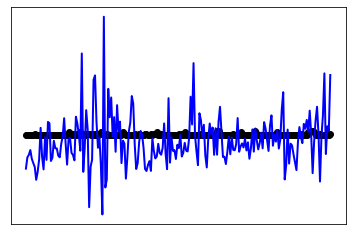

mse: 324.63152988518345, mae: 13.683009358651624
FOLD 1:


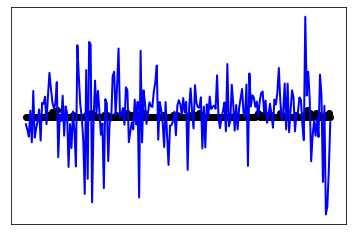

mse: 289.1331374453505, mae: 12.41870804018446
FOLD 2:


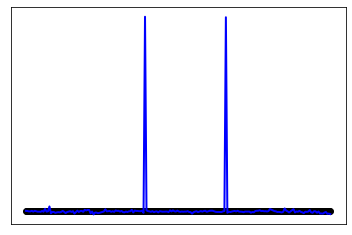

mse: 200114.42482726177, mae: 60.02072741852929
FOLD 3:


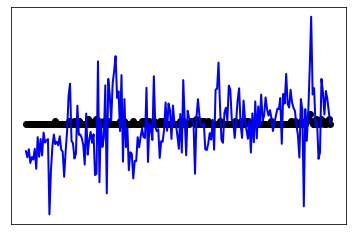

mse: 128.8789636066886, mae: 9.033967333544025
FOLD 4:


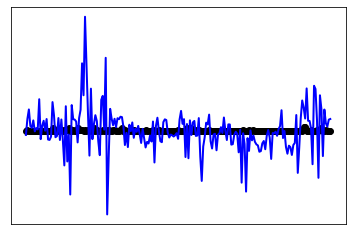

mse: 326.84165297725394, mae: 12.42171128026965
FOLD 5:


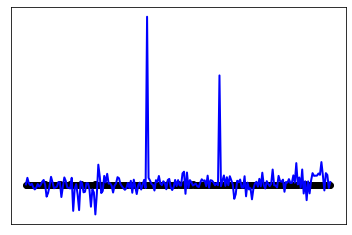

mse: 1309.6477832430835, mae: 15.114441091875543
FOLD 6:


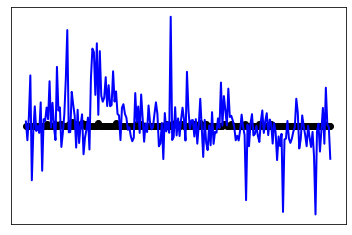

mse: 391.74423364746167, mae: 13.56500279842673
FOLD 7:


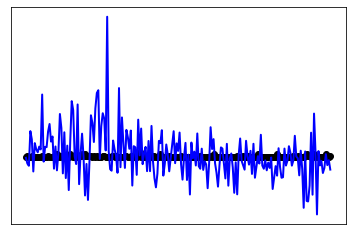

mse: 241.68680675250246, mae: 11.278857841043322
FOLD 8:


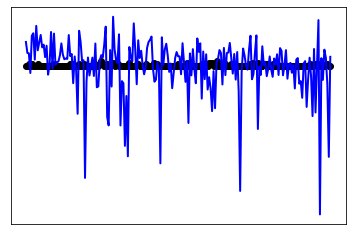

mse: 371.76831818656933, mae: 12.798175228919828
FOLD 9:


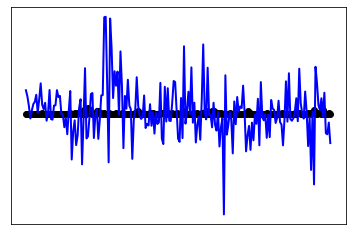

mse: 296.2941373840227, mae: 12.189633700007521


,mse,mae
count,10.000000,10.000000
mean,20379.505139,17.252423
std,63153.258208,15.112305
min,128.878964,9.033967
25%,290.923387,12.246902
50%,325.736591,12.609943
75%,386.750255,13.653508
max,200114.424827,60.020727


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVR
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = np.array(X_data1)
y = np.array(y_data_regressor)

# display(Counter(y_data))
# print()

c = 100
g = 'auto'
d = 1
ke = 'poly'
e = 1

regr = SVR(kernel=ke, degree=d, gamma=g, C=c, epsilon=e)

print(f"Resultados do regressor {regr}:\n")

k_fold = KFold(10, shuffle=True, random_state=5)

metricas = pd.DataFrame()

for k, (train, test) in enumerate(k_fold.split(X, y)):

  regr.fit(X[train], y[train])
  
  predicted = regr.predict(X[test])
  
  eixo_x = np.arange(0, y[test].size, 1)
  
  print(f"FOLD {k}:")
  
  plt.scatter(eixo_x, y[test],  color='black')
  plt.plot(eixo_x, predicted, color='blue', linewidth=2)
  plt.xticks(())
  plt.yticks(())
  plt.show()

  mse = mean_squared_error(y[test], predicted)
  mae = mean_absolute_error(y[test], predicted)
  
  print(f"mse: {mse}, mae: {mae}")
  
  df = pd.DataFrame([[mse, mae]], columns=['mse', 'mae'])
  metricas = metricas.append(df, ignore_index=True)

display(metricas.describe())

Resultados do regressor SVR(C=100, degree=1, epsilon=1, gamma='auto', kernel='poly'):

FOLD 0:


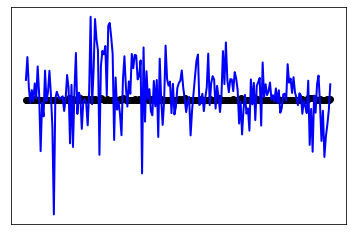

mse: 1567.1805219637063, mae: 28.953316822299083
FOLD 1:


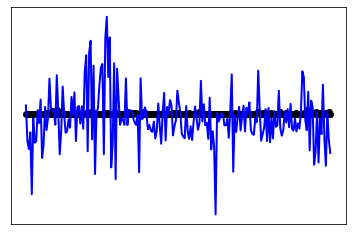

mse: 1039.4293195802682, mae: 23.716543145710464
FOLD 2:


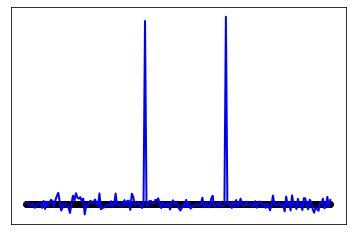

mse: 13104.39559683459, mae: 29.35268988335836
FOLD 3:


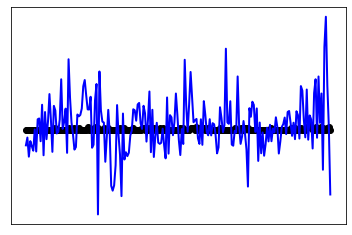

mse: 474.5307340842004, mae: 16.25534337025953
FOLD 4:


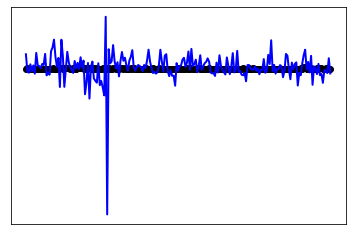

mse: 1393.9968898500856, mae: 21.1657979117198
FOLD 5:


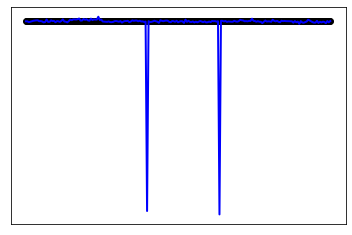

mse: 433448.5786891618, mae: 93.59150856345936
FOLD 6:


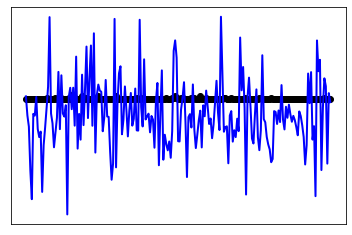

mse: 767.5792505977292, mae: 22.573173334686874
FOLD 7:


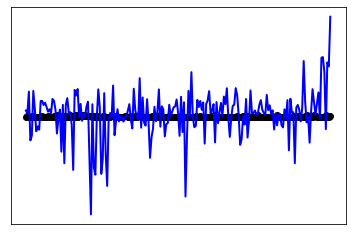

mse: 822.3189001117546, mae: 19.794021797562777
FOLD 8:


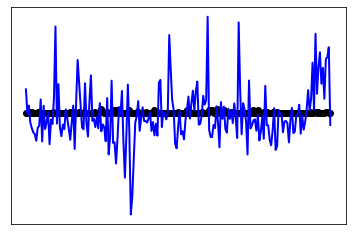

mse: 539.1598690920515, mae: 17.04250022656585
FOLD 9:


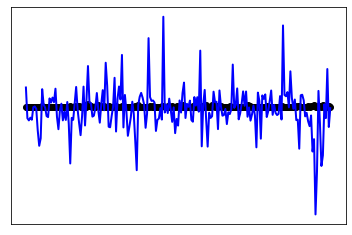

mse: 1131.9894386827696, mae: 22.945005344259823


,mse,mae
count,10.000000,10.000000
mean,45428.915921,29.538990
std,136389.993885,22.916998
min,474.530734,16.255343
25%,781.264163,20.136966
50%,1085.709379,22.759089
75%,1523.884614,27.644123
max,433448.578689,93.591509


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVR
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = np.array(X_data2)
y = np.array(y_data_regressor)

# display(Counter(y_data))
# print()

c = 100
g = 'auto'
d = 1
ke = 'poly'
e = 1

regr = SVR(kernel=ke, degree=d, gamma=g, C=c, epsilon=e)

print(f"Resultados do regressor {regr}:\n")

k_fold = KFold(10, shuffle=True, random_state=5)

metricas = pd.DataFrame()

for k, (train, test) in enumerate(k_fold.split(X, y)):

  regr.fit(X[train], y[train])
  
  predicted = regr.predict(X[test])
  
  eixo_x = np.arange(0, y[test].size, 1)
  
  print(f"FOLD {k}:")
  
  plt.scatter(eixo_x, y[test],  color='black')
  plt.plot(eixo_x, predicted, color='blue', linewidth=2)
  plt.xticks(())
  plt.yticks(())
  plt.show()

  mse = mean_squared_error(y[test], predicted)
  mae = mean_absolute_error(y[test], predicted)
  
  print(f"mse: {mse}, mae: {mae}")
  
  df = pd.DataFrame([[mse, mae]], columns=['mse', 'mae'])
  metricas = metricas.append(df, ignore_index=True)

display(metricas.describe())

Resultados do regressor DecisionTreeRegressor(max_depth=3):

FOLD 0:


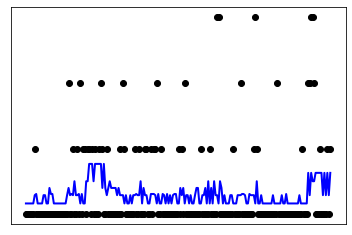

mse: 0.4615455443345447, mae: 0.46645072542875216
FOLD 1:


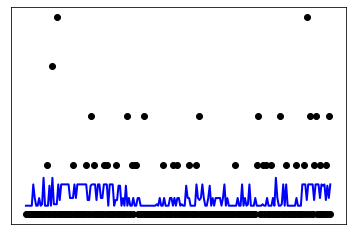

mse: 0.45778285254449497, mae: 0.47602295748770007
FOLD 2:


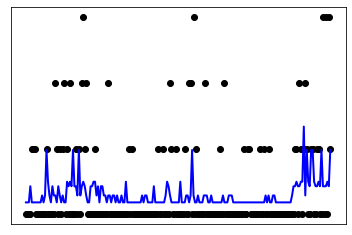

mse: 0.48829199436991944, mae: 0.4726730578587584
FOLD 3:


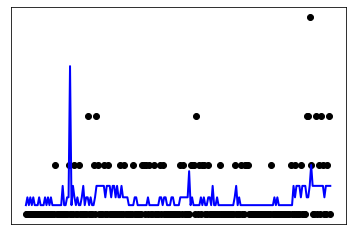

mse: 0.37691485599299135, mae: 0.45109392767643086
FOLD 4:


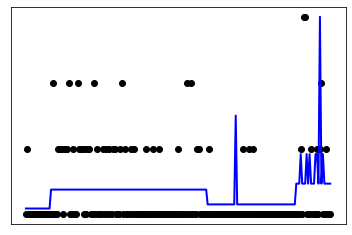

mse: 0.3513655810186102, mae: 0.4372113336722768
FOLD 5:


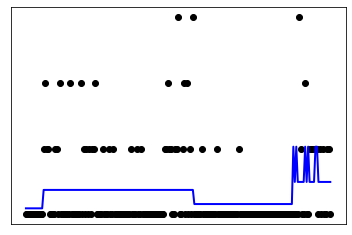

mse: 0.35196128074588, mae: 0.4273264448645112
FOLD 6:


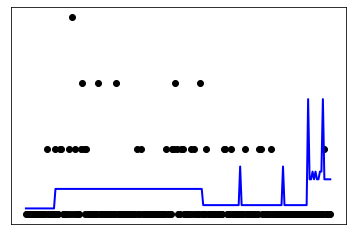

mse: 0.2788835640500309, mae: 0.39638083426708126
FOLD 7:


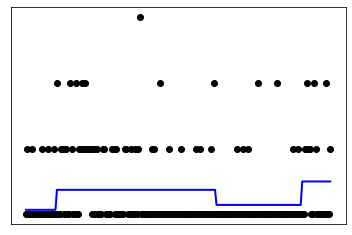

mse: 0.35737452695027705, mae: 0.4495180635807429
FOLD 8:


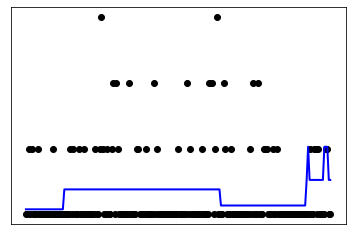

mse: 0.3826083474610041, mae: 0.4443223271828143
FOLD 9:


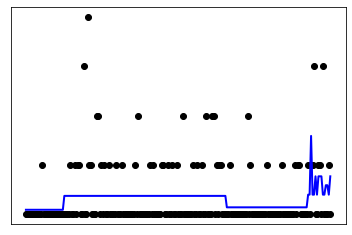

mse: 0.42305360415864085, mae: 0.44606850675437626


,mse,mae
count,10.000000,10.000000
mean,0.392978,0.446707
std,0.064079,0.023464
min,0.278884,0.396381
25%,0.353315,0.438989
50%,0.379762,0.447793
75%,0.449101,0.462612
max,0.488292,0.476023


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import RandomOverSampler

X = np.array(X_data1)
y = np.array(y_data_regressor)

# display(Counter(y_data))
# print()

d = 3

regr = DecisionTreeRegressor(max_depth=d)

print(f"Resultados do regressor {regr}:\n")

k_fold = KFold(10, shuffle=True, random_state=5)

metricas = pd.DataFrame()

for k, (train, test) in enumerate(k_fold.split(X, y)):

  regr.fit(X[train], y[train])
  
  predicted = regr.predict(X[test])
  
  eixo_x = np.arange(0, y[test].size, 1)
  
  print(f"FOLD {k}:")
  
  plt.scatter(eixo_x, y[test],  color='black')
  plt.plot(eixo_x, predicted, color='blue', linewidth=2)
  plt.xticks(())
  plt.yticks(())
  plt.show()

  mse = mean_squared_error(y[test], predicted)
  mae = mean_absolute_error(y[test], predicted)
  
  print(f"mse: {mse}, mae: {mae}")
  
  df = pd.DataFrame([[mse, mae]], columns=['mse', 'mae'])
  metricas = metricas.append(df, ignore_index=True)

display(metricas.describe())

Resultados do regressor DecisionTreeRegressor(max_depth=3):

FOLD 0:


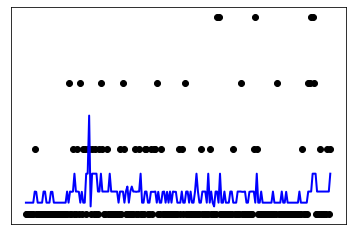

mse: 0.4641923831404815, mae: 0.47072198702147366
FOLD 1:


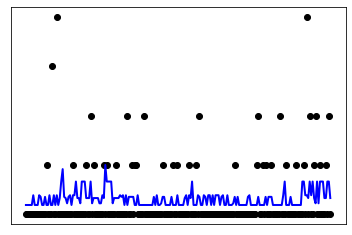

mse: 0.4343823155922618, mae: 0.45402805898508214
FOLD 2:


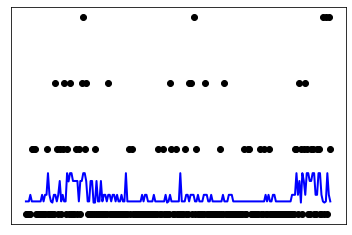

mse: 0.49658722205562955, mae: 0.485898679974134
FOLD 3:


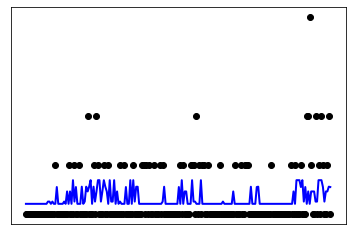

mse: 0.35861821874018485, mae: 0.45099161524613696
FOLD 4:


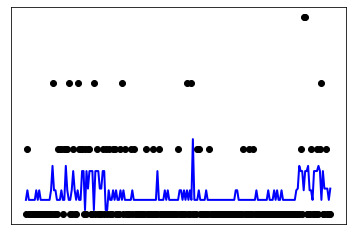

mse: 0.3460126609835437, mae: 0.44161035630210993
FOLD 5:


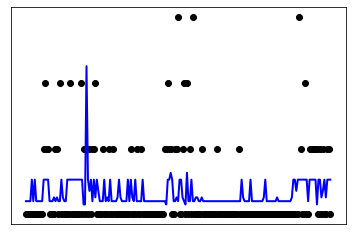

mse: 0.37463786951096323, mae: 0.44383678066305715
FOLD 6:


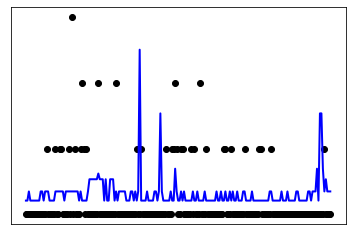

mse: 0.3083745815477247, mae: 0.4176361595438838
FOLD 7:


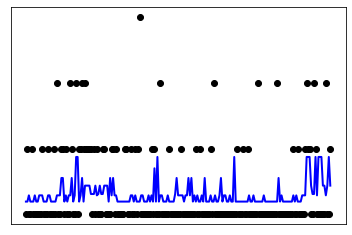

mse: 0.36656796939748565, mae: 0.45303247769924565
FOLD 8:


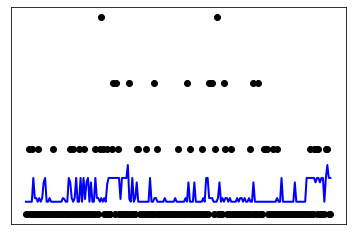

mse: 0.3908191216855226, mae: 0.45179491967719476
FOLD 9:


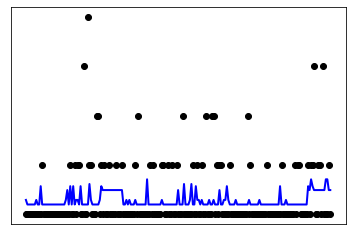

mse: 0.44961246326519755, mae: 0.4566333221659721


,mse,mae
count,10.000000,10.000000
mean,0.398980,0.452618
std,0.059582,0.017885
min,0.308375,0.417636
25%,0.360606,0.445625
50%,0.382728,0.452414
75%,0.445805,0.455982
max,0.496587,0.485899


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import RandomOverSampler

X = np.array(X_data2)
y = np.array(y_data_regressor)

# display(Counter(y_data))
# print()

d = 3

regr = DecisionTreeRegressor(max_depth=d)

print(f"Resultados do regressor {regr}:\n")

k_fold = KFold(10, shuffle=True, random_state=5)

metricas = pd.DataFrame()

for k, (train, test) in enumerate(k_fold.split(X, y)):

  regr.fit(X[train], y[train])
  
  predicted = regr.predict(X[test])
  
  eixo_x = np.arange(0, y[test].size, 1)
  
  print(f"FOLD {k}:")
  
  plt.scatter(eixo_x, y[test],  color='black')
  plt.plot(eixo_x, predicted, color='blue', linewidth=2)
  plt.xticks(())
  plt.yticks(())
  plt.show()

  mse = mean_squared_error(y[test], predicted)
  mae = mean_absolute_error(y[test], predicted)
  
  print(f"mse: {mse}, mae: {mae}")
  
  df = pd.DataFrame([[mse, mae]], columns=['mse', 'mae'])
  metricas = metricas.append(df, ignore_index=True)

display(metricas.describe())

Considerando os resultados dos dois modelos e das duas configurações, os resultados com a árvore de decisão apresentaram valores médios relativamente ruins, mse acima de 0.35, mae acima de 0.40, contudo, os resultados foram consideravelmente melhores em comparação aos dos modelos com SVM.

No contexto da SVM, a segunda configuração promoveu piora no resultado das duas métricas consideradas. No contexto do DecisionTreeRegressor, as duas configurações de base de entrada apresentaram valores médios semelhantes em todas as métricas avaliadas.